In [143]:
from pathlib import Path
import os
import numpy as np
import numpy.matlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [144]:
def lineplot_7d_rmse(rmse_list, model_list, title):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    df = pd.DataFrame()
    for i in range(len(rmse_list)):
        df[model_list[i]] = rmse_list[i]
    df.index = np.arange(1,8,1)
    
    for i in range(len(rmse_list)):
        g = sns.lineplot(data=df, x=df.index, y=model_list[i], legend=True, label=model_list[i], marker='o') #markers=['o' for _ in range(len(rmse_list))])
        g.set_xticks(df.index)
        g.set_xlabel("Day")
        g.set_ylabel("RMSE (case per million)")
        g.set_title(title)
        #g.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [163]:
def lineplot_7d_rmse2(rmse_list, model_list, title):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    sns.set_theme()
    
    df_mean = pd.DataFrame()
    df_err = pd.DataFrame()
    
    for i, rmse in enumerate(rmse_list):
        df_mean[model_list[i]] = np.mean(rmse,axis=1)
        df_err[model_list[i]] = np.std(rmse,axis=1)/np.sqrt(len(rmse.columns))
        
    #plot error bars
    ax = df_mean.plot(figsize=(12,8), yerr = df_err, legend = False)
    #reset color cycle so that the marker colors match
    ax.set_prop_cycle(None)
    df_mean.plot(figsize=(10,6), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax)
    ax.set_xticks(df_mean.index)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.set_xlabel("Day", fontsize=24)
    ax.set_ylabel("RMSE (case per million)", fontsize=24)
    ax.set_title(title, fontsize=32)
    #ax.set_ylim(0, 400)
    #g.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [146]:
def lineplot_7d_rmse_errorbar(rmse_list, model_list, title):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    df = pd.DataFrame()
    for i in range(len(rmse_list)):
        df[model_list[i]] = rmse_list[i]
    df.index = np.arange(1,8,1)
    
    for i in range(len(rmse_list)):
        g = sns.lineplot(data=df, x=df.index, y=model_list[i], err_style='band', legend=True, label=model_list[i], marker='o') #markers=['o' for _ in range(len(rmse_list))])
        g.set_xticks(df.index, fontsize=14)
        g.set_xlabel("Day", fontsize=24)
        g.set_ylabel("RMSE", fontsize=24)
        g.set_title(title, fontsize=32)
        #g.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [147]:
def mean_across_countries(rez_dict):
    country_array = np.empty((7,len(rez_dict.keys())))
    
    for i, country in enumerate(rez_dict.keys()):
        country_array[:,i] = rez_dict[country]
    df = pd.DataFrame(country_array, columns = rez_dict.keys())
    df.index = list(range(1,8))
    return df

In [148]:
def mean_across_countries2(rez_dict):
    country_array = np.empty((7,len(rez_dict.keys())))
    
    for i, country in enumerate(rez_dict.keys()):
        country_array[:,i] = rez_dict[country]['rmse']
    df = pd.DataFrame(country_array, columns = rez_dict.keys())
    df.index = list(range(1,8))
    return df

In [149]:
def train_val_test_bar_plot(train_rmse, val_rmse, test_rmse, savename=None):
    n_country = train_rmse.values.shape[1]
    
    mean_arr = np.asarray([np.nanmean(train_rmse.values, axis=1),
                           np.nanmean(val_rmse.values, axis=1),
                           np.nanmean(test_rmse.values, axis=1)])
    
    sem_arr = np.asarray([np.nanstd(train_rmse.values, axis=1)/np.sqrt(n_country),
                          np.nanstd(val_rmse.values, axis=1)/np.sqrt(n_country),
                          np.nanstd(test_rmse.values, axis=1)/np.sqrt(n_country)])
    
    df_mean = pd.DataFrame({'set':['train','validation','test']})
    df_sem = pd.DataFrame({'set':['train','validation','test']})
    for i in range(mean_arr.shape[1]):  
        df_mean['d'+str(i+1)] = mean_arr[:,i]
        df_sem['d'+str(i+1)] = sem_arr[:,i]
    df_mean.set_index('set', inplace=True)
    df_sem.set_index('set', inplace=True)
    
    ax = df_mean.plot(kind='bar', yerr=df_sem, logy=True, rot=0, figsize=(6, 5), width=.8)
    ax.set_xlabel('Set', fontsize=14, fontweight='bold')
    ax.set_ylabel('Cases per million', fontsize=14, fontweight='bold')          
    ax.set_title(savename+' prediction error (rmse)', fontweight='bold', fontsize=16)    
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=14, bbox_to_anchor=(.62, .51, .62, .51), loc='upper right')

Load MLP result

In [150]:
filePath_mlp = Path('/Users/parkj/Documents/pyDat/dataSet/covid19_MLP_7d_with_lagging_shorter_test_period_colab.pickle')
with open(filePath_mlp, 'rb') as f:
     rez_mlp_7d = pickle.load(f)

mlp_train_rmse = mean_across_countries(rez_mlp_7d['train']['rmse'])
mlp_val_rmse = mean_across_countries(rez_mlp_7d['validation']['rmse'])
mlp_test_rmse = mean_across_countries(rez_mlp_7d['test']['rmse'])

Generate errorbars for MLP rmse

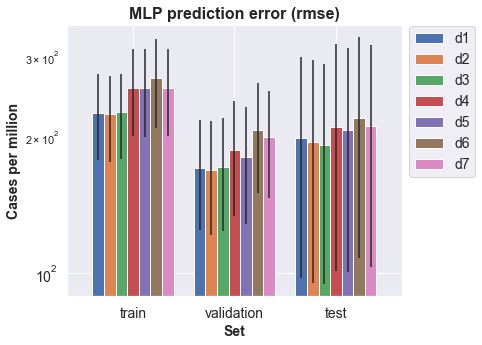

In [151]:
train_val_test_bar_plot(mlp_train_rmse, mlp_val_rmse, mlp_test_rmse, savename='MLP')

Load LSTM result

In [152]:
filePath_lstm = Path('/Users/parkj/Documents/pyDat/dataSet/covid19_LSTM_7d_with_lagging_shorter_test_period_colab.pickle')
with open(filePath_lstm, 'rb') as f:
     rez_LSTM_7d = pickle.load(f)

lstm_train_rmse =  mean_across_countries(rez_LSTM_7d['train']['rmse'])
lstm_val_rmse = mean_across_countries(rez_LSTM_7d['validation']['rmse'])
lstm_test_rmse = mean_across_countries(rez_LSTM_7d['test']['rmse'])

Generate errorbars for LSTM rmse

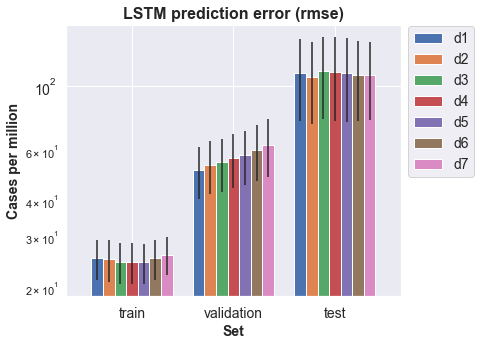

In [153]:
train_val_test_bar_plot(lstm_train_rmse, lstm_val_rmse, lstm_test_rmse, savename='LSTM')

Load SARIMAX result

In [154]:
filePath_srm = Path('/Users/parkj/Documents/pyDat/dataSet/covid19_country_srm_7d_with_lagging.pickle')
with open(filePath_srm, 'rb') as f:
     rez_sarimax_7d = pickle.load(f)

sarimax_train_rmse = mean_across_countries2(rez_sarimax_7d['train'])
sarimax_val_rmse = mean_across_countries2(rez_sarimax_7d['validation'])
sarimax_test_rmse = mean_across_countries2(rez_sarimax_7d['test'])

Generate errorbars for sarimax rmse

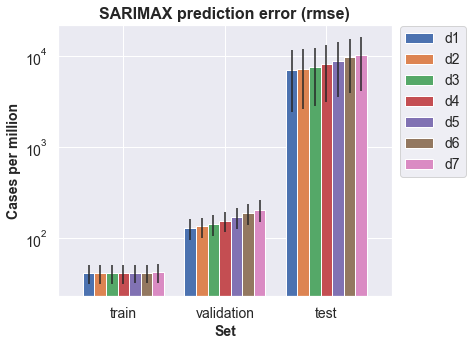

In [155]:
train_val_test_bar_plot(sarimax_train_rmse, sarimax_val_rmse, sarimax_test_rmse, savename='SARIMAX')

Load XGBoost result

In [156]:
filePath_xgbr = Path('/Users/parkj/Documents/pyDat/dataSet/covid19_country_xgbr_7d_with_lagging.pickle')
with open(filePath_xgbr, 'rb') as f:
     rez_xgbr_7d = pickle.load(f)

xgbr_train_rmse = mean_across_countries2(rez_xgbr_7d['train'])       
xgbr_val_rmse = mean_across_countries2(rez_xgbr_7d['validation'])
xgbr_test_rmse = mean_across_countries2(rez_xgbr_7d['test'])

Generate errorbars for XGBoost rmse

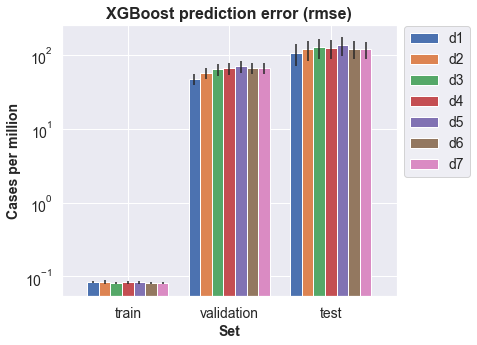

In [157]:
train_val_test_bar_plot(xgbr_train_rmse, xgbr_val_rmse, xgbr_test_rmse, savename='XGBoost')

Plot model performance (RMSE) on train sets

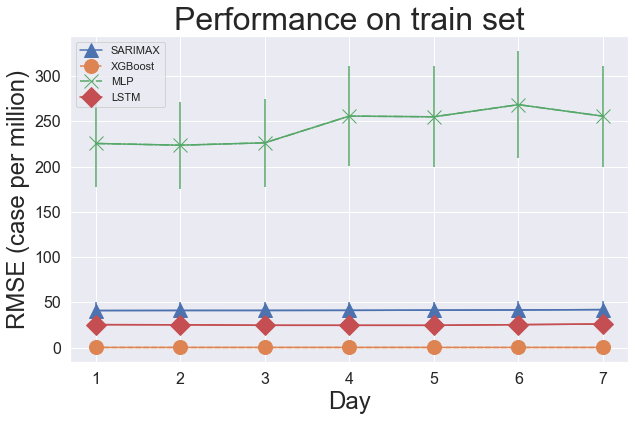

In [158]:
rmse_list = [sarimax_train_rmse, xgbr_train_rmse, mlp_train_rmse, lstm_train_rmse]
model_list = ['SARIMAX', 'XGBoost', 'MLP', 'LSTM']
lineplot_7d_rmse2(rmse_list, model_list, "Performance on train set")

Plot model performance (RMSE) on validation sets

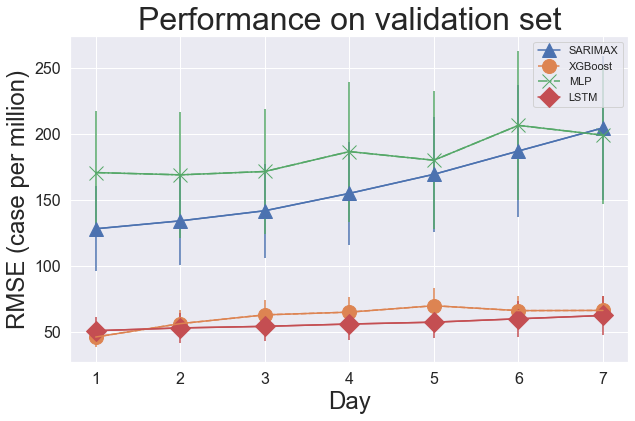

In [159]:
rmse_list = [sarimax_val_rmse, xgbr_val_rmse, mlp_val_rmse, lstm_val_rmse]
model_list = ['SARIMAX', 'XGBoost', 'MLP', 'LSTM']
lineplot_7d_rmse2(rmse_list, model_list, "Performance on validation set")

Plot model performance (RMSE) on test sets

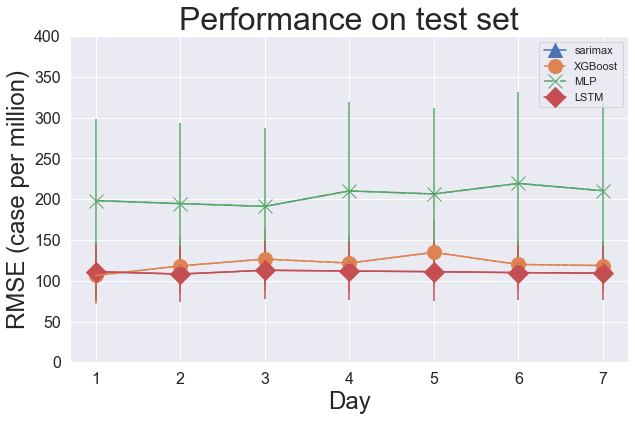

In [164]:
rmse_list = [sarimax_test_rmse, xgbr_test_rmse, mlp_test_rmse, lstm_test_rmse]
model_list = ['sarimax','XGBoost', 'MLP', 'LSTM']
lineplot_7d_rmse2(rmse_list, model_list, "Performance on test set")

In [141]:
def lineplot_7d_rmse(rmse_list, model_list, title):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    df = pd.DataFrame()
    for i in range(len(rmse_list)):
        df[model_list[i]] = rmse_list[i]
    df.index = np.arange(1,8,1)
    
    for i in range(len(rmse_list)):
        g = sns.lineplot(data=df, x=df.index, y=model_list[i], legend=False, label=model_list[i], marker='o') #markers=['o' for _ in range(len(rmse_list))])
        g.set_xticks(df.index)
        g.set_xlabel("Day")
        g.set_ylabel("RMSE")
        g.set_title(title)
        #g.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)